In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Objective: maximize the payload

In [2]:
def H_mission(x,y,sequence):
    assert np.abs(np.sum(sequence)- 1)<1e-6, "Error: The sum of betas must be equal to 1"
    Hm=np.exp(-np.max(sequence) *y/x)- x**2 *np.sum(1-np.exp(-sequence *y/x))
    return Hm

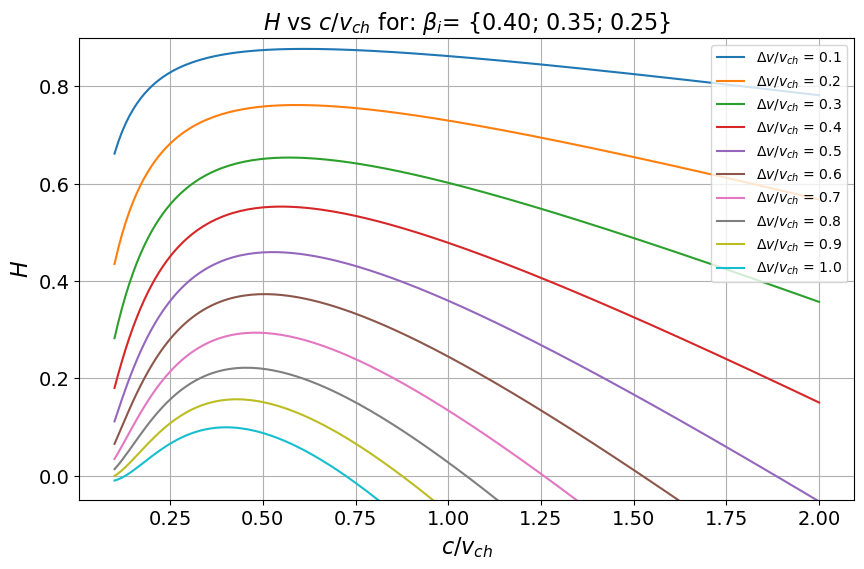

In [5]:
x_vec=np.arange(0.1,2.01,0.01)
y_vec=np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
sequence=np.array([.4,.35,.25])

fig=plt.figure(figsize=(10,6))

for y in y_vec:
    Hm=[]
    for x in x_vec:
        Hm.append(H_mission(x,y,sequence)) 
    plt.plot(x_vec,Hm,label=rf"$\Delta v/v_{{ch}}$ = {y}")



plt.ylim([-.05,.9])
    
plt.xlabel(r'$c/v_{ch}$',fontsize=16)  
plt.ylabel(r'$H$',fontsize=16)   

str = r'$H$ vs $c/v_{ch}$ for: $\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
plt.title(str,fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

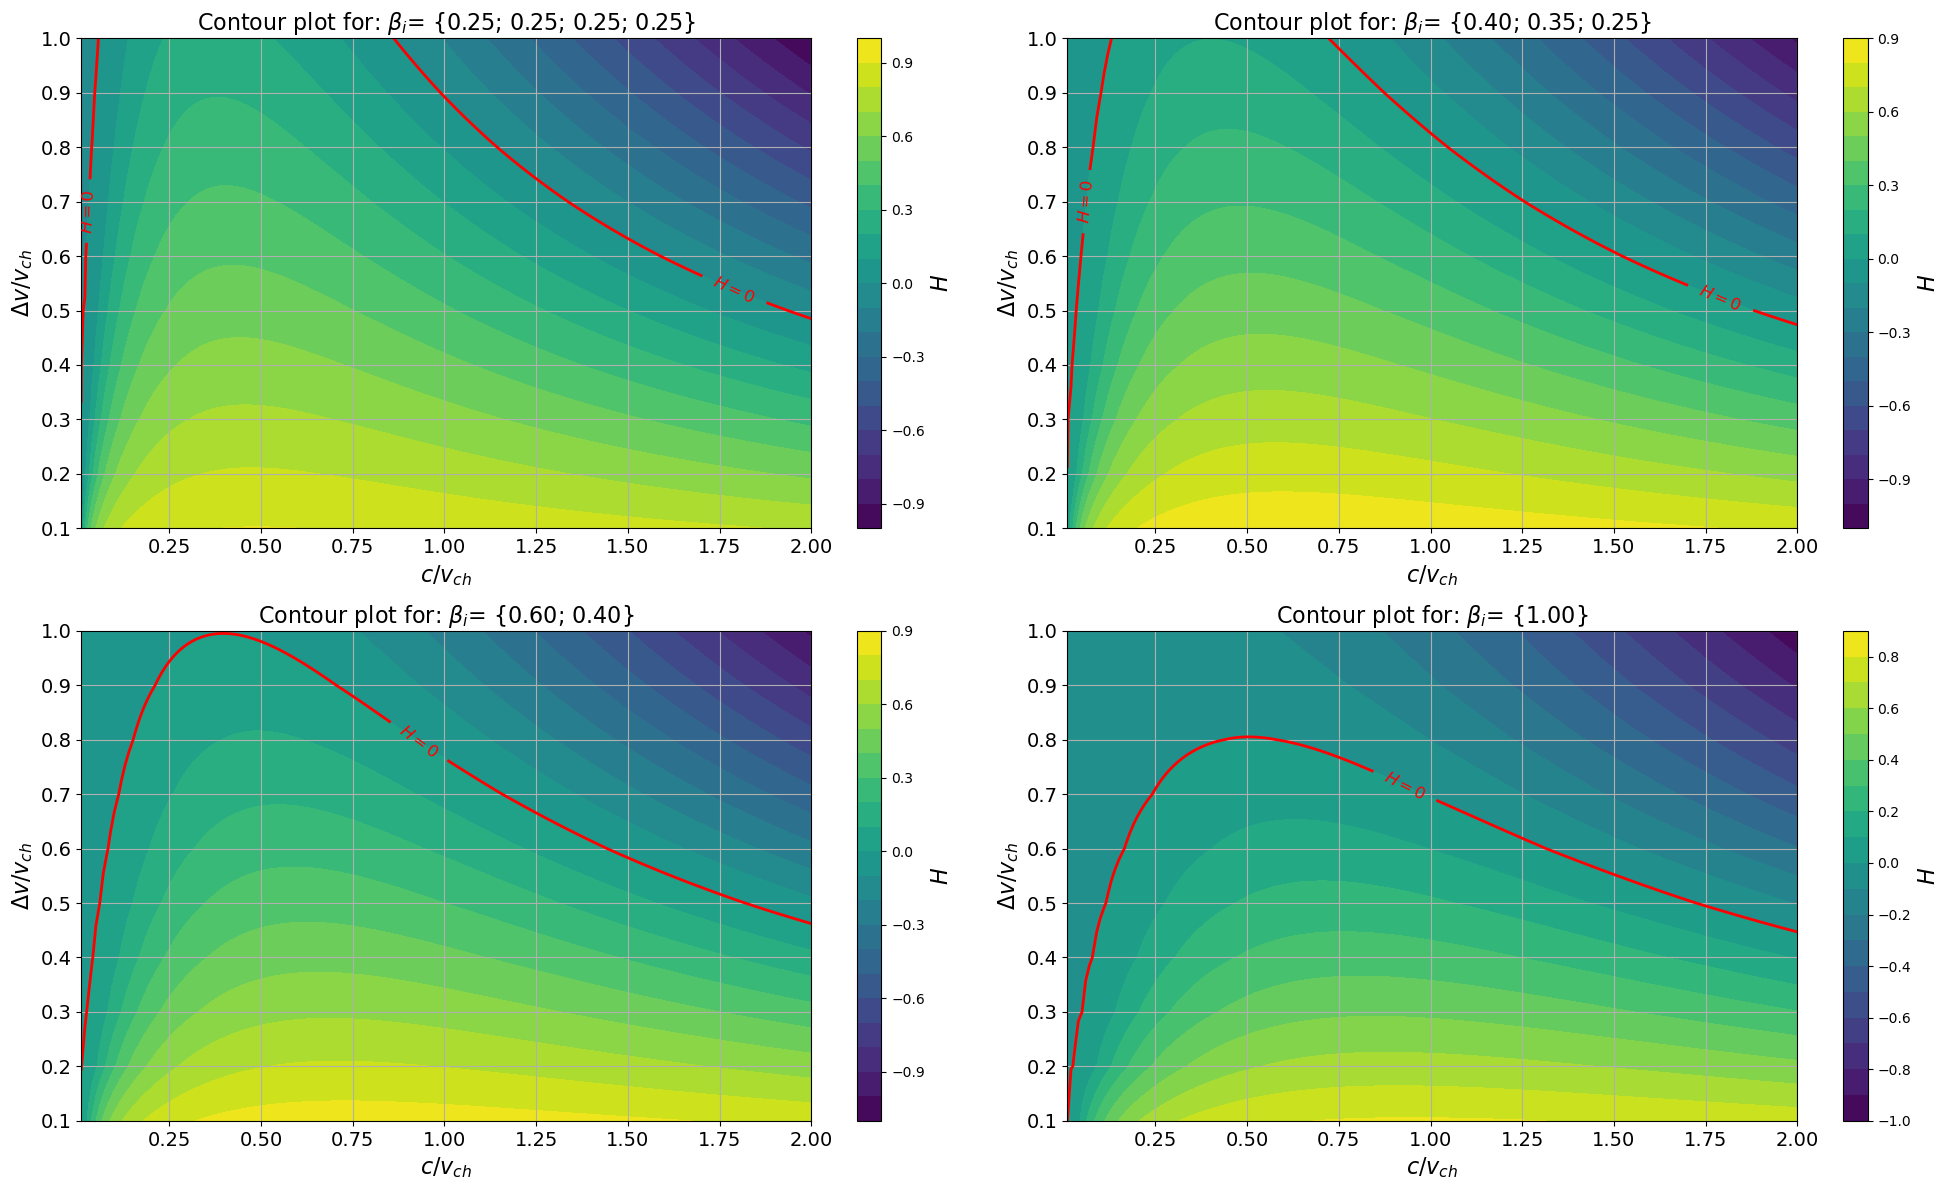

In [12]:
x_vec = np.arange(0.01, 2.01, 0.01)
y_vec = np.array([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1])))

fig, axs = plt.subplots(2, 2, figsize=(20, 12))

for idx, sequence in enumerate(sequence_list):
    X, Y = np.meshgrid(x_vec, y_vec)
    Hm_values = np.zeros_like(X)

    for i in range(Y.shape[0]):
        for j in range(X.shape[1]):
            Hm_values[i, j] = H_mission(X[i, j], Y[i, j], sequence)

    ax = axs[idx // 2, idx % 2]

    contour = ax.contourf(X, Y, Hm_values, levels=20, cmap='viridis')
    cbar = fig.colorbar(contour, ax=ax)
    cbar.set_label(r'$H$', fontsize=16)

    # Adding the red line where Hm = 0
    contour_lines = ax.contour(X, Y, Hm_values, levels=[0], colors='red', linewidths=2)
    ax.clabel(contour_lines, inline=True, fontsize=12, fmt=r'$H=0$')

    ax.set_xlabel(r'$c/v_{ch}$', fontsize=16)
    ax.set_ylabel(r'$\Delta v/v_{ch}$', fontsize=16)
    title_str = r'Contour plot for: $\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    ax.set_title(title_str, fontsize=16)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()


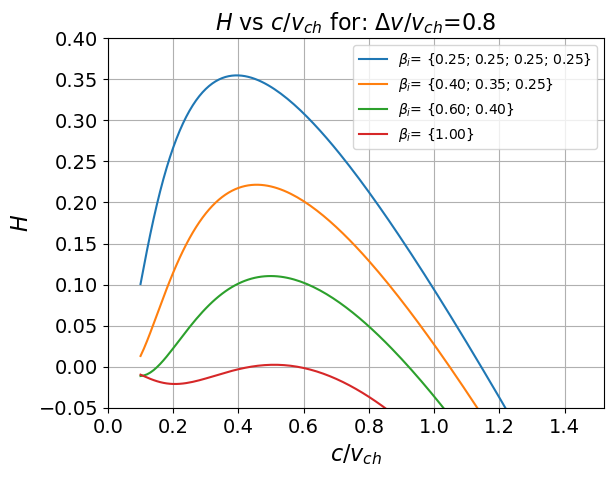

In [13]:
y=0.8
x_vec=np.arange(0.1,2.01,0.01)

sequence_list = list(( np.array([.25, .25, .25, .25]), \
                      np.array([.4, .35, .25]), \
                      np.array([.6, .4]), \
                      np.array([1])))


for sequence in sequence_list:
    Hm=[]
    for x in x_vec:
        Hm.append(H_mission(x,y,sequence))
    
    betas_str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    plt.plot(x_vec,Hm,label=betas_str)
    

plt.xlim([0,1.52])
plt.ylim([-.05,.4])
    
plt.xlabel(r'$c/v_{ch}$',fontsize=16)  
plt.ylabel(r'$H$',fontsize=16)   
plt.title(rf'$H$ vs $c/v_{{ch}}$ for: $\Delta v/v_{{ch}}$={y}',fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
    

# Fuel consideration

In [7]:
def fuel_consumption(x,y,sequence):
    Hm=H_mission(x,y,sequence)
    mp=np.sum(1-np.exp(-sequence *y/x))
    f=mp/Hm
    return f

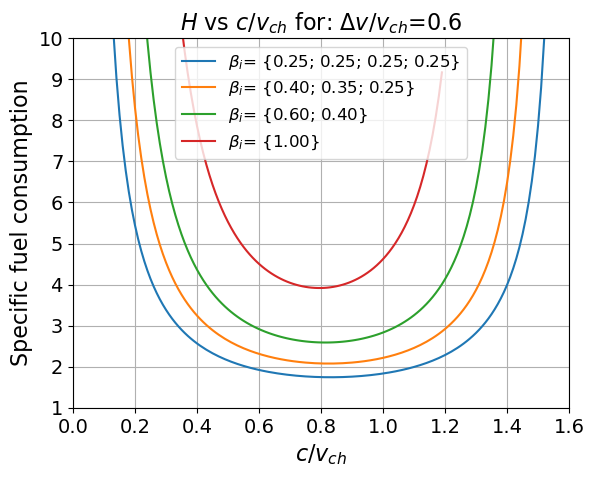

In [8]:
y=0.6

j=0
x_vec=np.arange(0.1,1.57,0.01)
f=[]
for x in x_vec:
    f.append(fuel_consumption(x,y,sequence_list[j]))
str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence_list[j]]) + '}'
plt.plot(x_vec,f,label=str)

j=1
x_vec=np.arange(0.1,1.47,0.01)
f=[]
for x in x_vec:
    f.append(fuel_consumption(x,y,sequence_list[j]))
str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence_list[j]]) + '}'
plt.plot(x_vec,f,label=str)


j=2
x_vec=np.arange(0.1,1.37,0.01)
f=[]
for x in x_vec:
    f.append(fuel_consumption(x,y,sequence_list[j]))
str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence_list[j]]) + '}'
plt.plot(x_vec,f,label=str)


j=3
x_vec=np.arange(0.2,1.2,0.01)
f=[]
for x in x_vec:
    f.append(fuel_consumption(x,y,sequence_list[j]))
str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence_list[j]]) + '}'
plt.plot(x_vec,f,label=str)





plt.xlabel(r'$c/v_{ch}$',fontsize=16)  
plt.ylabel(r'Specific fuel consumption',fontsize=16)   
plt.title(rf'$H$ vs $c/v_{{ch}}$ for: $\Delta v/v_{{ch}}$={y}',fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([0,1.6])
plt.ylim([1,10])
plt.legend(loc="best",fontsize=12)

# Objective: minimize mission $t_m$ (minimize $v_{ch}$)

In [39]:
from scipy.optimize import fsolve

In [47]:
def y_value(x, H, sequence):
    assert np.abs(np.sum(sequence)- 1)<1e-6, "Error: The sum of betas must be equal to 1"
    
    def equation_to_solve(y):
        return H_mission(x, y, sequence) - H

    y_initial_guess = 0.5  # You can adjust this initial guess if needed
    y_solution = fsolve(equation_to_solve, y_initial_guess)
    return y_solution[0]



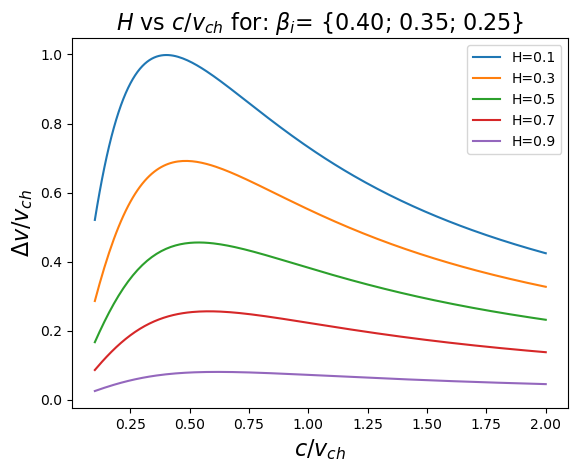

In [71]:
H_vec=np.array([0.1,.3,.5,.7,.9])
x_vec=np.arange(0.1,2.01,0.01)

sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1])))

sequence=sequence_list[0]



for H in H_vec:
     y_values=[]
     for x in x_vec:
          y_values.append(y_value(x, H, sequence))
     
     plt.plot(x_vec,y_values,label=f"H={H}")


plt.xlabel(r'$c/v_{ch}$',fontsize=16)  
plt.ylabel(r'$\Delta v/v_{ch}$',fontsize=16)  
str = r'$H$ vs $c/v_{ch}$ for: $\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
plt.title(str,fontsize=16)  


plt.legend()

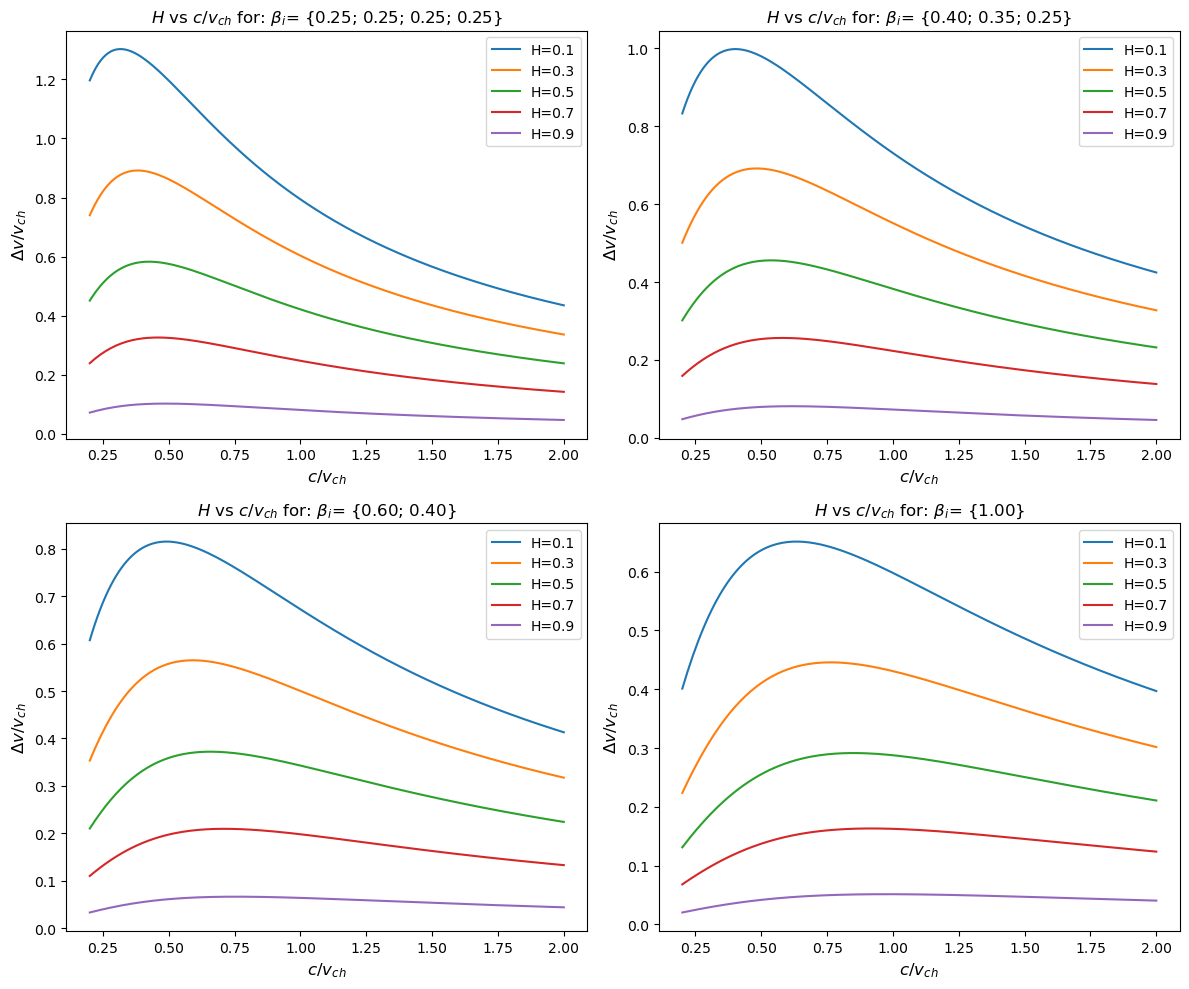

In [73]:
H_vec = np.array([0.1, .3, .5, .7, .9])
x_vec = np.arange(0.2, 2.01, 0.01)

sequence_list = [
    np.array([.25, .25, .25, .25]), 
    np.array([.4, .35, .25]), 
    np.array([.6, .4]), 
    np.array([1])
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten to easily iterate over

for i, sequence in enumerate(sequence_list):
    ax = axes[i]
    for H in H_vec:
        y_values = [y_value(x, H, sequence) for x in x_vec]
        ax.plot(x_vec, y_values, label=f"H={H}")

    ax.set_xlabel(r'$c/v_{ch}$', fontsize=12)
    ax.set_ylabel(r'$\Delta v/v_{ch}$', fontsize=12)
    title_str = r'$H$ vs $c/v_{ch}$ for: $\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    ax.set_title(title_str, fontsize=12)
    ax.legend()

plt.tight_layout()  # Adjust layout so titles/labels don't overlap
plt.show()


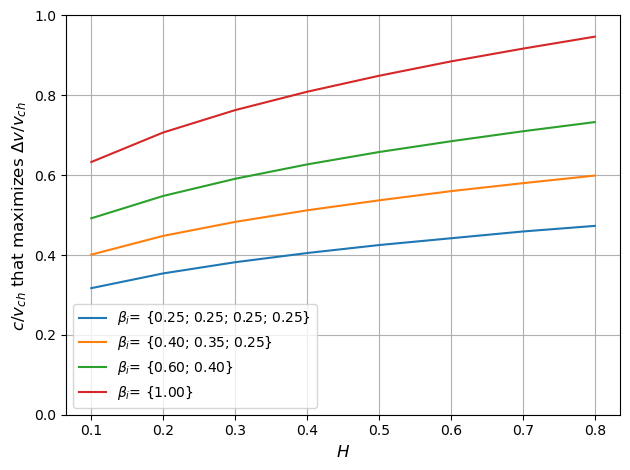

In [104]:
H_vec = np.arange(0.1, 0.9, 0.1)
x_vec = np.arange(0.2, 2.01, 0.001)

sequence_list = [
    np.array([.25, .25, .25, .25]), 
    np.array([.4, .35, .25]), 
    np.array([.6, .4]), 
    np.array([1])
]

fig=plt.figure()


for i, sequence in enumerate(sequence_list):
    ax = axes[i]
    argmax_y=[]
    for H in H_vec: 
        y_values = [y_value(x, H, sequence) for x in x_vec]
        argmax_y.append(x_vec[np.argmax(y_values)])
        
    label_str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    plt.plot(H_vec, argmax_y,label=label_str)



plt.xlabel(r'$H$', fontsize=12)
plt.ylabel(r'$c/v_{ch}$ that maximizes $\Delta v/v_{ch}$ ', fontsize=12)
plt.ylim([0,1])
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout so titles/labels don't overlap
plt.show()
